# Proyek Klasifikasi Gambar: [Fruit Classification]
- **Nama:** Valensia Elsa Kurnia
- **Email:** mc185d5x1079@student.devacademy.id
- **ID Dicoding:** MC185D5X1079

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install tensorflow

In [2]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [3]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Sequential, layers, applications, optimizers, callbacks
import tensorflowjs as tfjs

# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Preparation

### Data Loading

In [4]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"valensiaelsakurnia","key":"c4287404537f6b82f7d127b79d980513"}'}

In [5]:
# Hapus semua folder yang berpotensi bentrok
!rm -rf "Fruits Classification"

# Setup kredensial Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset Fruits Classification dari Utkarsh Saxena
!kaggle datasets download -d utkarshsaxenadn/fruits-classification

# Unzip file dataset
!unzip fruits-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: Fruits Classification/train/Grape/Grape (1950).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1952).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1953).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1955).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1956).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1957).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1958).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1959).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (196).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1960).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1961).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1962).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1963).jpeg  
  inflating: Fruits Classification/train/Grape/Grape (1964).jpeg  
  inflating:

###Gabungkan Data Training, Testing, dan Validation

In [6]:
# Direktori awal untuk train, test, dan val
train_dir = "Fruits Classification/train"
test_dir = "Fruits Classification/test"
val_dir = "Fruits Classification/valid"

# Direktori baru untuk dataset gabungan
combined_dir = "Fruits Classification/dataset"

# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)

# Fungsi untuk menyalin isi folder per kategori
def copy_data(src_dir):
    for category in os.listdir(src_dir):
        category_dir = os.path.join(src_dir, category)
        if os.path.isdir(category_dir):
            shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin dari train, test, dan val
copy_data(train_dir)
copy_data(test_dir)
copy_data(val_dir)

###Plot Gambar Sample di Setiap Kelas

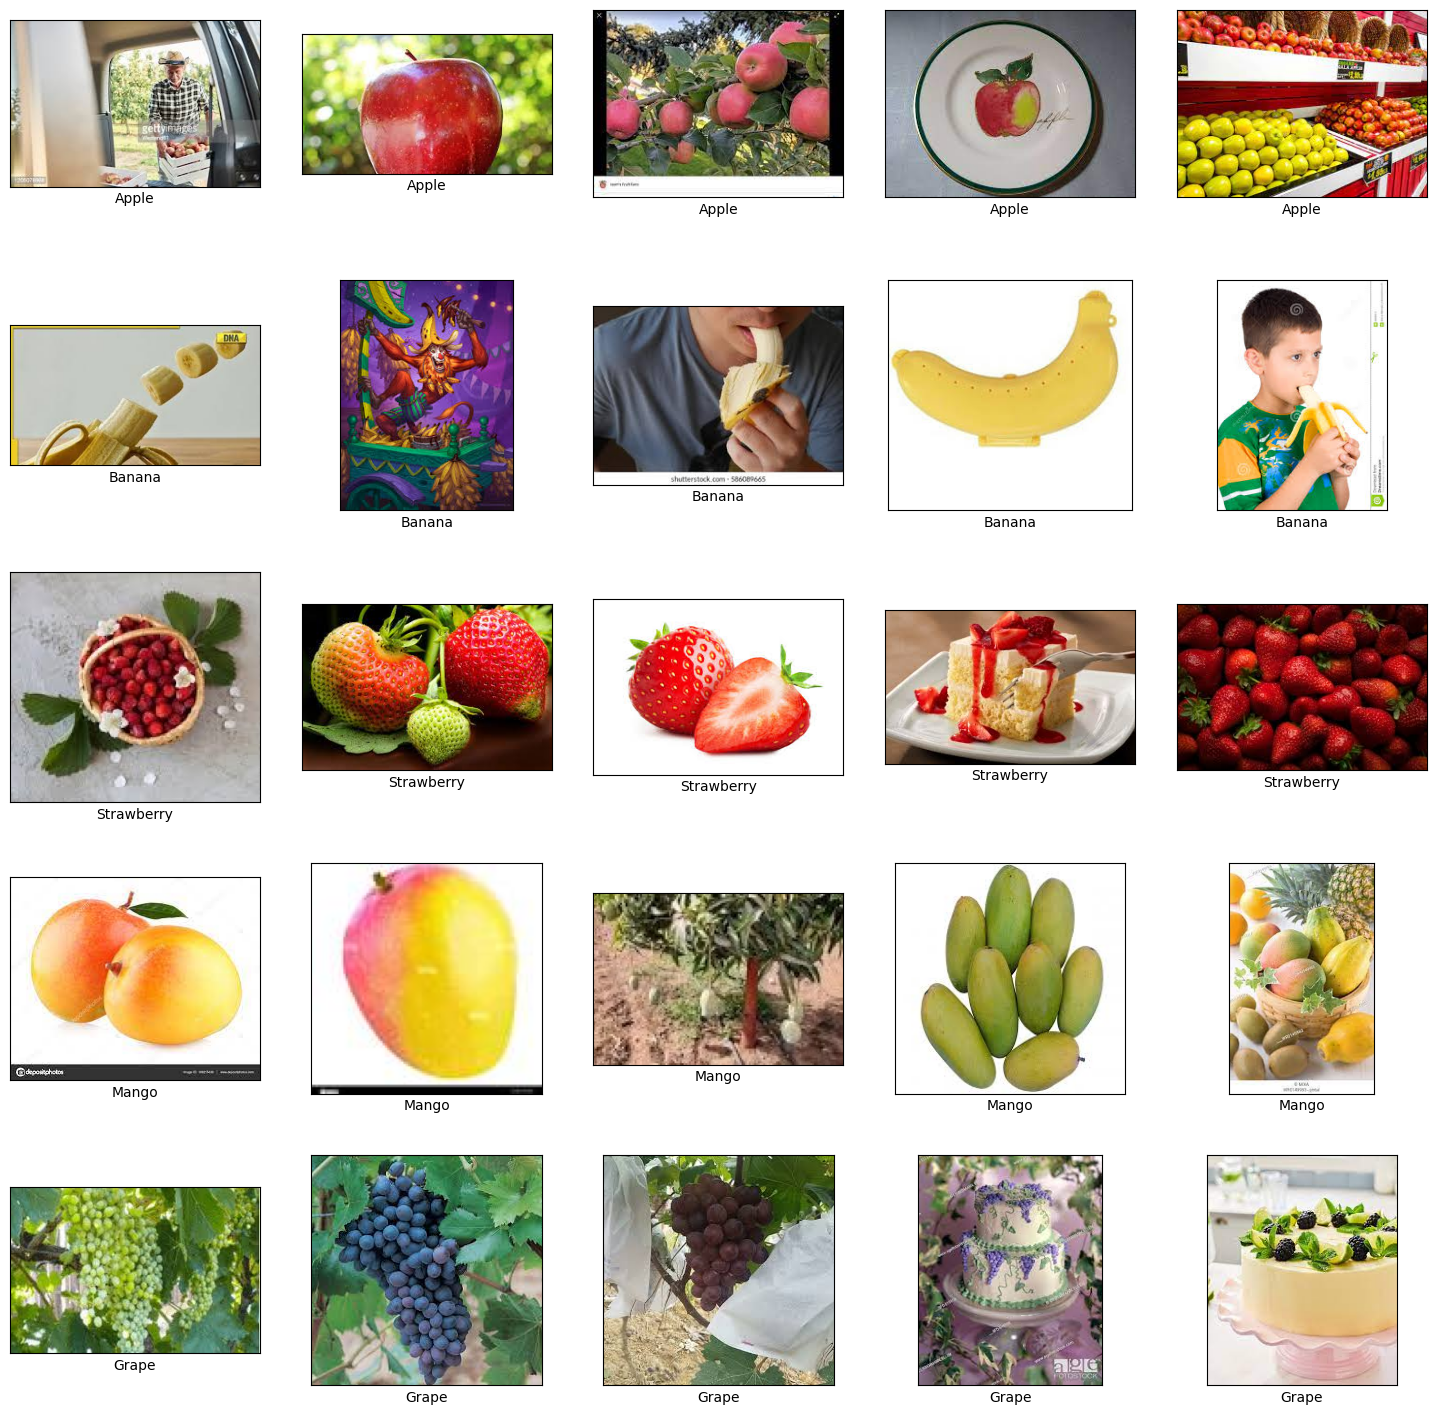

In [7]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
fruit_images = {}

# Tentukan path sumber dataset
path = "Fruits Classification/dataset"

# Menyimpan gambar di setiap kelas dalam kamus
for category in os.listdir(path):
    category_path = os.path.join(path, category)
    if os.path.isdir(category_path):
        fruit_images[category] = os.listdir(category_path)

# Menentukan jumlah gambar yang ingin ditampilkan di bawah setiap kelas
num_images = 5

# Menentukan ukuran plot berdasarkan jumlah kelas
fig, axs = plt.subplots(len(fruit_images.keys()), num_images, figsize=(15, len(fruit_images.keys()) * 3))

# Loop untuk menampilkan gambar
for i, (class_name, images) in enumerate(fruit_images.items()):
    selected_images = np.random.choice(images, num_images, replace=False)

    for j, image_name in enumerate(selected_images):
        img_path = os.path.join(path, class_name, image_name)
        img = Image.open(img_path).convert("RGB")  # Menggunakan RGB untuk gambar berwarna
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])

# Menyesuaikan layout agar lebih rapi
fig.tight_layout(pad=3.0)

# Menampilkan gambar
plt.show()


###Plot Distribusi Gambar di Seluruh Kelas

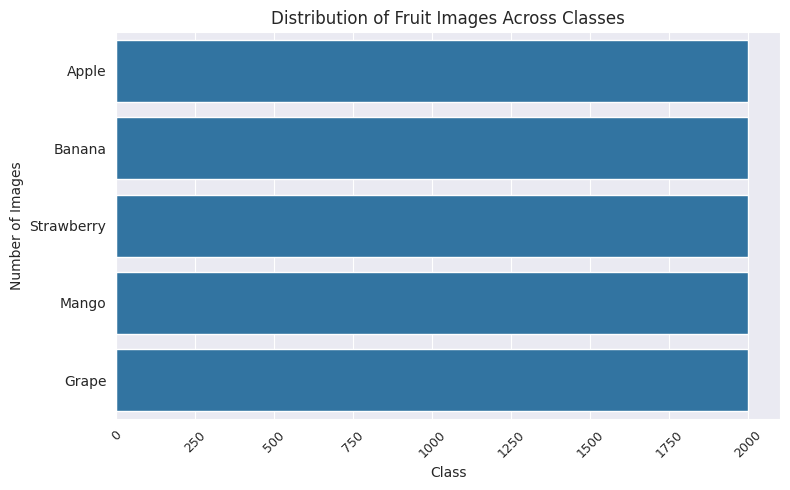

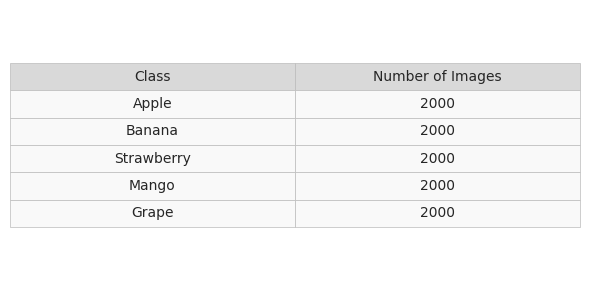

In [8]:
# Menentukan path dataset
fruit_path = "Fruits Classification/dataset"

# Membuat list kosong untuk menyimpan data
file_name = []
labels = []
full_path = []

# Mengambil nama file, label, dan path lengkap dari folder
for path, subdirs, files in os.walk(fruit_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

# Membuat dataframe dari data yang sudah diambil
distribution_fruit = pd.DataFrame({"path": full_path, 'file_name': file_name, "labels": labels})

# Plot distribusi jumlah gambar per kelas
Label = distribution_fruit['labels']
plt.figure(figsize=(8, 5))  # Ukuran lebih kecil
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

# Memberi judul dan label
plt.title('Distribution of Fruit Images Across Classes', fontsize=12)
plt.xlabel('Class', fontsize=10)
plt.ylabel('Number of Images', fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()

# Membuat tabel untuk jumlah gambar per kelas
counts = distribution_fruit['labels'].value_counts().reset_index()
counts.columns = ['Class', 'Number of Images']

# Plot table jumlah gambar per kelas
plt.figure(figsize=(6, len(counts) * 0.4 + 1))  # Tinggi dinamis sesuai jumlah baris
plt.axis('off')
table = plt.table(cellText=counts.values,
                  colLabels=counts.columns,
                  loc='center',
                  cellLoc='center',
                  colLoc='center',
                  cellColours=[['#f9f9f9', '#f9f9f9']] * len(counts),  # Warna latar sel
                  colColours=['#d9d9d9', '#d9d9d9'])  # Warna header
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.4)
for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor('#bbbbbb')
    cell.set_linewidth(0.5)

# Menampilkan semua visualisasi
plt.tight_layout()
plt.show()

In [9]:
# Menampilkan ukuran resolusi dari gambar di setiap kelas
def print_fruit_images_resolution(directory):
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            image_files = os.listdir(subdir_path)
            num_images = len(image_files)
            print(f"{subdir}: {num_images} images")
            total_images += num_images

            for img_file in image_files:
                img_path = os.path.join(subdir_path, img_file)
                with Image.open(img_path) as img:
                    unique_sizes.add(img.size)

            for size in unique_sizes:
                print(f"- {size}")
            print("---------------")

    print(f"\nTotal: {total_images} images")

# Memanggil fungsi
fruit_path = "Fruits Classification/dataset"
print_fruit_images_resolution(fruit_path)

Apple: 2000 images
- (149, 110)
- (206, 244)
- (147, 176)
- (99, 136)
- (177, 284)
- (201, 251)
- (112, 75)
- (183, 135)
- (186, 271)
- (189, 267)
- (276, 183)
- (145, 90)
- (162, 170)
- (82, 159)
- (93, 79)
- (334, 151)
- (280, 180)
- (194, 238)
- (272, 185)
- (257, 196)
- (111, 69)
- (284, 177)
- (134, 89)
- (306, 164)
- (183, 121)
- (298, 169)
- (244, 207)
- (233, 216)
- (250, 147)
- (125, 125)
- (345, 146)
- (138, 91)
- (237, 213)
- (130, 87)
- (177, 171)
- (149, 338)
- (325, 155)
- (105, 161)
- (213, 112)
- (130, 105)
- (182, 115)
- (192, 156)
- (194, 107)
- (221, 228)
- (224, 224)
- (73, 73)
- (189, 266)
- (276, 182)
- (202, 196)
- (73, 91)
- (149, 59)
- (145, 107)
- (225, 225)
- (154, 183)
- (106, 106)
- (167, 122)
- (130, 82)
- (216, 234)
- (282, 179)
- (96, 98)
- (99, 94)
- (274, 184)
- (294, 171)
- (153, 330)
- (255, 198)
- (286, 176)
- (185, 273)
- (131, 64)
- (98, 116)
- (197, 256)
- (244, 206)
- (181, 168)
- (84, 83)
- (189, 117)
- (213, 102)
- (208, 243)
- (317, 159)
- (2

### Data Preprocessing

#### Split Dataset

In [10]:
# Panggil variabel mypath yang menampung folder dataset gambar untuk buah
mypath = "Fruits Classification/dataset"

# Inisialisasi variabel untuk menyimpan informasi
file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])  # Mendapatkan label berdasarkan folder
        file_name.append(name)

# Memasukkan data ke dalam DataFrame untuk pengelolaan yang lebih rapi
df = pd.DataFrame({"path": full_path, 'file_name': file_name, "labels": labels})

# Melihat jumlah data gambar pada masing-masing label
print(df.groupby(['labels']).size())

labels
Apple         2000
Banana        2000
Grape         2000
Mango         2000
Strawberry    2000
dtype: int64


In [11]:
# Variabel yang digunakan pada pemisahan data ini dimana variabel X = data path dan Y = data labels
X = df['path']
y = df['labels']

# Split dataset awal menjadi data train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=300)

# Split data train lebih lanjut menjadi train (80%) dan validation (20%) dari data train awal
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=300)

# Cek jumlah data train, validation, dan test
print(f'Train size: {len(X_train)}')
print(f'Validation size: {len(X_val)}')
print(f'Test size: {len(X_test)}')

Train size: 6400
Validation size: 1600
Test size: 2000


In [12]:
# Menyatukan data train, validation, dan test ke dalam dataframe masing-masing
df_tr = pd.DataFrame({'path': X_train, 'labels': y_train, 'set': 'train'})
df_val = pd.DataFrame({'path': X_val, 'labels': y_val, 'set': 'validation'})
df_te = pd.DataFrame({'path': X_test, 'labels': y_test, 'set': 'test'})

# Gabungkan DataFrame train, validation, dan test ke dalam satu DataFrame
df_all = pd.concat([df_tr, df_val, df_te], ignore_index=True)

# Tampilkan distribusi data dalam bentuk tabel
distribution = df_all.groupby(['set', 'labels']).size().unstack(fill_value=0)
print(distribution)

labels      Apple  Banana  Grape  Mango  Strawberry
set                                                
test          411     384    417    383         405
train        1250    1304   1276   1291        1279
validation    339     312    307    326         316


#### Image Data Generator

In [13]:
# Tentukan folder untuk menampung data final
datasource_path = "Fruits Classification/dataset"
dataset_path = "Dataset-Final/"

# Membuat folder untuk training dan testing
for index, row in tq(df_all.iterrows()):
    file_path = row['path']
    if os.path.exists(file_path) == False:
        file_path = os.path.join(datasource_path, row['labels'], row['file_name'].split('.')[0])

    # Buat direktori tujuan folder untuk masing-masing data set
    if os.path.exists(os.path.join(dataset_path, row['set'], row['labels'])) == False:
        os.makedirs(os.path.join(dataset_path, row['set'], row['labels']))

    # Tentukan tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path, row['set'], row['labels'], destination_file_name)

    # Salin file dari sumber ke tujuan
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path, file_dest)

0it [00:00, ?it/s]

In [14]:
# Direktori untuk training, testing, dan validation
TRAIN_DIR = "Dataset-Final/train/"
TEST_DIR = "Dataset-Final/test/"
VAL_DIR = "Dataset-Final/validation/"

# Daftar kelas yang ada dalam dataset
classes = ['Apple', 'Banana', 'Grape', 'Strawberry', 'Mango']

# Fungsi untuk menghitung jumlah gambar di setiap kelas dan set
def count_images_in_directory(directory, classes):
    image_count = {}
    for fruit in classes:
        class_dir = os.path.join(directory, fruit)
        image_count[fruit] = len(os.listdir(class_dir))
    return image_count

# Menghitung jumlah gambar di setiap set
train_counts = count_images_in_directory(TRAIN_DIR, classes)
test_counts = count_images_in_directory(TEST_DIR, classes)
val_counts = count_images_in_directory(VAL_DIR, classes)

# Menampilkan hasilnya dengan format yang rapi
def display_counts(label, counts):
    print(f"\n{'='*40}\nJumlah gambar pada {label} set:\n{'='*40}")
    print(f"{'Class':<15}{'Jumlah gambar':>20}")
    print('-'*40)
    for fruit, count in counts.items():
        print(f"{fruit:<15}{count:>20}")
    print(f"{'='*40}\n")

# Menampilkan hasil
display_counts("training", train_counts)
display_counts("test", test_counts)
display_counts("validation", val_counts)



Jumlah gambar pada training set:
Class                 Jumlah gambar
----------------------------------------
Apple                          1250
Banana                         1304
Grape                          1276
Strawberry                     1279
Mango                          1291


Jumlah gambar pada test set:
Class                 Jumlah gambar
----------------------------------------
Apple                           411
Banana                          384
Grape                           417
Strawberry                      405
Mango                           383


Jumlah gambar pada validation set:
Class                 Jumlah gambar
----------------------------------------
Apple                           339
Banana                          312
Grape                           307
Strawberry                      316
Mango                           326



In [15]:
# Data Augmentation hanya pada training set
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalisasi gambar
    rotation_range=25,            # Rotasi gambar secara acak
    width_shift_range=0.2,        # Augmentasi pergeseran lebar
    height_shift_range=0.2,       # Augmentasi pergeseran tinggi
    shear_range=0.15,             # Augmentasi shear
    zoom_range=0.2,               # Augmentasi zoom
    horizontal_flip=True,         # Augmentasi flip horizontal
    brightness_range=[0.2, 1.5],  # Variasi kecerahan gambar
    fill_mode='nearest',          # Mengisi area kosong setelah augmentasi
)

# Tanpa augmentasi pada validation dan test set, hanya rescaling
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Membuat generator untuk training
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    batch_size=32,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    shuffle=True
)

# Membuat generator untuk validation
validation_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    batch_size=32,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

# Membuat generator untuk testing
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    batch_size=1,
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

Found 6400 images belonging to 5 classes.
Found 1600 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


## Modelling

In [16]:
# Load base model
base_model = applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,  # Tanpa fully connected layer di atas model
    weights='imagenet'  # Menggunakan pretrained weights dari ImageNet
)
base_model.trainable = True  # Membuat base model bisa dilatih

# Buat model
model = Sequential([
    base_model,
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(5, activation='softmax')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Ringkasan model
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 7, 7, 32)       │       368,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,639,461 (10.07 MB)

 Trainable params: 2,605,349 (9.94 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [17]:
# Menentukan path untuk setiap kelas di direktori pelatihan
train_apple = os.path.join(TRAIN_DIR, 'Apple')
train_banana = os.path.join(TRAIN_DIR, 'Banana')
train_grape = os.path.join(TRAIN_DIR, 'Grape')
train_strawberry = os.path.join(TRAIN_DIR, 'Strawberry')
train_mango = os.path.join(TRAIN_DIR, 'Mango')

# Menghitung jumlah data untuk setiap kelas
count_apple = len(os.listdir(train_apple))
count_banana = len(os.listdir(train_banana))
count_grape = len(os.listdir(train_grape))
count_strawberry = len(os.listdir(train_strawberry))
count_mango = len(os.listdir(train_mango))

# Menghitung total samples dan jumlah kelas
total_samples = count_apple + count_banana + count_grape + count_strawberry + count_mango
num_classes = 5  # 5 kelas (Apple, Banana, Grape, Strawberry, Mango)

# Menghitung bobot untuk setiap kelas dengan rumus: (1 / count) * (total_samples / num_classes)
weight_apple = (1 / count_apple) * (total_samples / num_classes)
weight_banana = (1 / count_banana) * (total_samples / num_classes)
weight_grape = (1 / count_grape) * (total_samples / num_classes)
weight_strawberry = (1 / count_strawberry) * (total_samples / num_classes)
weight_mango = (1 / count_mango) * (total_samples / num_classes)

# Menyusun class weights dalam dictionary
class_weights = {
    0: weight_apple,      # Kelas 0 untuk Apple
    1: weight_banana,     # Kelas 1 untuk Banana
    2: weight_grape,      # Kelas 2 untuk Grape
    3: weight_strawberry, # Kelas 3 untuk Strawberry
    4: weight_mango       # Kelas 4 untuk Mango
}

# Menampilkan hasil class weights
print("Class weights:")
print(class_weights)


Class weights:
{0: 1.024, 1: 0.9815950920245399, 2: 1.0031347962382444, 3: 1.0007818608287724, 4: 0.9914794732765299}


In [18]:
# Callback untuk menghentikan pelatihan lebih awal jika akurasi validasi tidak meningkat
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Callback untuk mengurangi learning rate ketika akurasi berhenti meningkat
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6)

# Melatih model
history = model.fit(
    train_generator,  # Data pelatihan
    epochs=50,  # Jumlah epoch
    validation_data=validation_generator,  # Data validasi
    callbacks=[earlystop, reduce_lr],  # Menggunakan callbacks
    class_weight=class_weights  # Menggunakan class weights untuk menangani ketidakseimbangan kelas
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 155s 514ms/step - accuracy: 0.4009 - loss: 2.7346 - val_accuracy: 0.7594 - val_loss: 1.9215 - learning_rate: 1.0000e-04
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 92s 462ms/step - accuracy: 0.7497 - loss: 1.9265 - val_accuracy: 0.8106 - val_loss: 1.7583 - learning_rate: 1.0000e-04
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 90s 451ms/step - accuracy: 0.8246 - loss: 1.6615 - val_accuracy: 0.8506 - val_loss: 1.6530 - learning_rate: 1.0000e-04
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 90s 451ms/step - accuracy: 0.8591 - loss: 1.4783 - val_accuracy: 0.8863 - val_loss: 1.4062 - learning_rate: 1.0000e-04
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 93s 464ms/step - accuracy: 0.8745 - loss: 1.3636 - val_accuracy: 0.8731 - val_loss: 1.3791 - learning_rate: 1.0000e-04
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 92s 460ms/step - accuracy: 0.8857 - loss: 1.2498 - val_accuracy: 0.8981 - val_loss: 1.2628 - learning_rate: 1.0000e-04
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 93s 4

In [19]:
# Ambil indeks epoch terbaik berdasarkan val_loss terendah
best_epoch = history.history['val_loss'].index(min(history.history['val_loss']))

# Ambil akurasi pelatihan dan validasi terbaik dari epoch tersebut
best_train_accuracy = history.history['accuracy'][best_epoch]
best_val_accuracy = history.history['val_accuracy'][best_epoch]

print(f"Akurasi pelatihan terbaik (berdasarkan val_loss terendah): {best_train_accuracy:.4f}")
print(f"Akurasi validasi terbaik (berdasarkan val_loss terendah): {best_val_accuracy:.4f}")
print(f"Model diambil dari epoch ke-{best_epoch + 1}")

Akurasi pelatihan terbaik (berdasarkan val_loss terendah): 0.9847
Akurasi validasi terbaik (berdasarkan val_loss terendah): 0.9413
Model diambil dari epoch ke-37


## Evaluasi dan Visualisasi

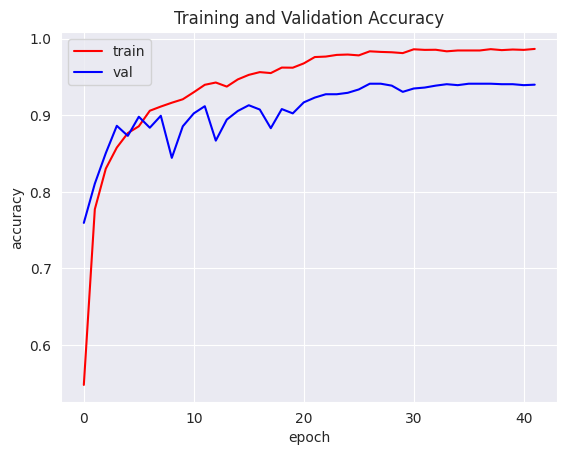

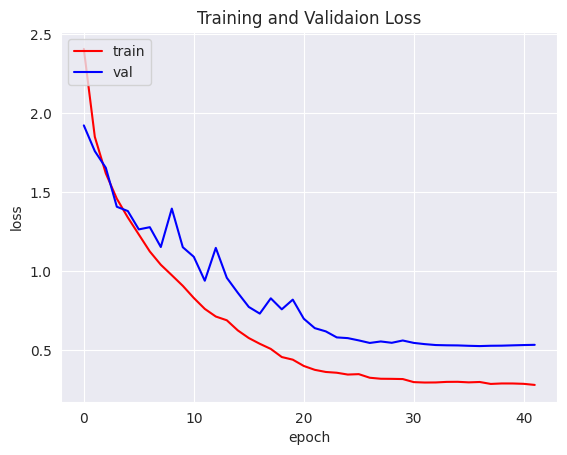

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

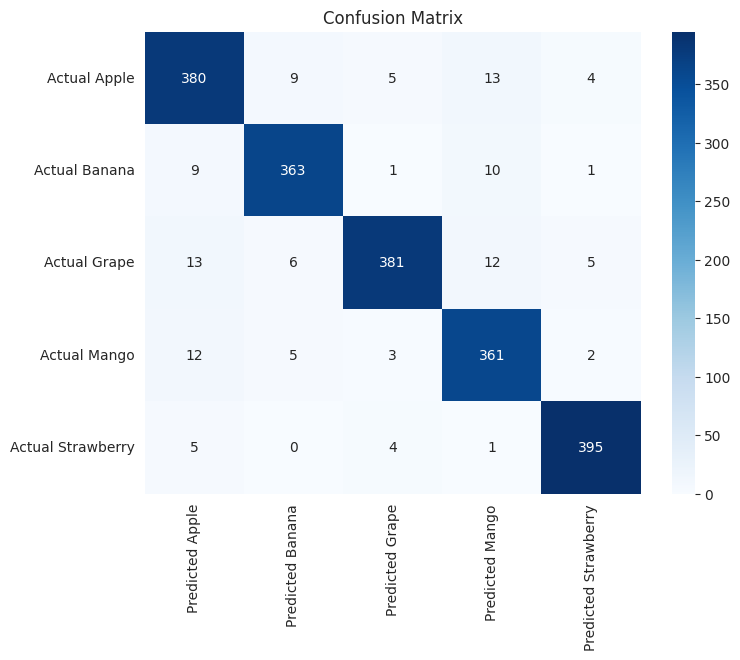


Classification Report:

              precision    recall  f1-score   support

       Apple     0.9069    0.9246    0.9157       411
      Banana     0.9478    0.9453    0.9465       384
       Grape     0.9670    0.9137    0.9396       417
       Mango     0.9093    0.9426    0.9256       383
  Strawberry     0.9705    0.9753    0.9729       405

    accuracy                         0.9400      2000
   macro avg     0.9403    0.9403    0.9401      2000
weighted avg     0.9406    0.9400    0.9401      2000



In [21]:
test_generator.reset()

# Prediksi model
preds_final = model.predict(test_generator, verbose=0)
y_pred = np.argmax(preds_final, axis=1)  # Ambil index kelas tertinggi
y_true = test_generator.classes

# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_true, y_pred),
                  index=["Actual Apple", "Actual Banana", "Actual Grape", "Actual Mango", "Actual Strawberry"],
                  columns=["Predicted Apple", "Predicted Banana", "Predicted Grape", "Predicted Mango", "Predicted Strawberry"])
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred,
                            target_names=['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry'],
                            digits=4))

## Konversi Model

In [22]:
# Buat struktur direktori penyimpanan
base_dir = "submission"
os.makedirs(f"{base_dir}/saved_model", exist_ok=True)
os.makedirs(f"{base_dir}/tflite", exist_ok=True)
os.makedirs(f"{base_dir}/tfjs_model", exist_ok=True)

SavedModel

In [23]:
# Simpan model ke format SavedModel
saved_model_path = os.path.join(base_dir, "saved_model")
tf.saved_model.save(model, saved_model_path)
print("Model disimpan dalam format SavedModel.")

Model disimpan dalam format SavedModel.


TFLite

In [24]:
# Konversi ke format TFLite dengan resource variables diaktifkan
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tflite_converter.convert()
tflite_model_path = os.path.join(base_dir, "tflite", "model.tflite")
with open(tflite_model_path, "wb") as file:
    file.write(tflite_model)
print("Model berhasil dikonversi ke TFLite.")

# Simpan file label untuk TFLite
class_names = ['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']
label_txt_path = os.path.join(base_dir, "tflite", "label.txt")
with open(label_txt_path, "w") as label_file:
    for label in class_names:
        label_file.write(label + "\n")
print("Label kelas disimpan sebagai label.txt.")

Saved artifact at '/tmp/tmpcj7jfl75'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  133741216530896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133741216534352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133741216531088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133741216531856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133741216534928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133741216535120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133741216534544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133741216533776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133741216535312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133741216532816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1337412165

TensorFlow.js

In [25]:
# Konversi ke format TensorFlow.js
tfjs_output_path = os.path.join(base_dir, "tfjs_model")
tfjs.converters.convert_tf_saved_model(saved_model_path, tfjs_output_path)
print("Model berhasil dikonversi ke format TensorFlow.js.")

Model berhasil dikonversi ke format TensorFlow.js.


Kompres ZIP

In [26]:
from google.colab import files

# Kompres direktori submission menjadi ZIP
shutil.make_archive("submission", 'zip', base_dir)
files.download("submission.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference (Optional)

Input shape model: [  1 224 224   3]


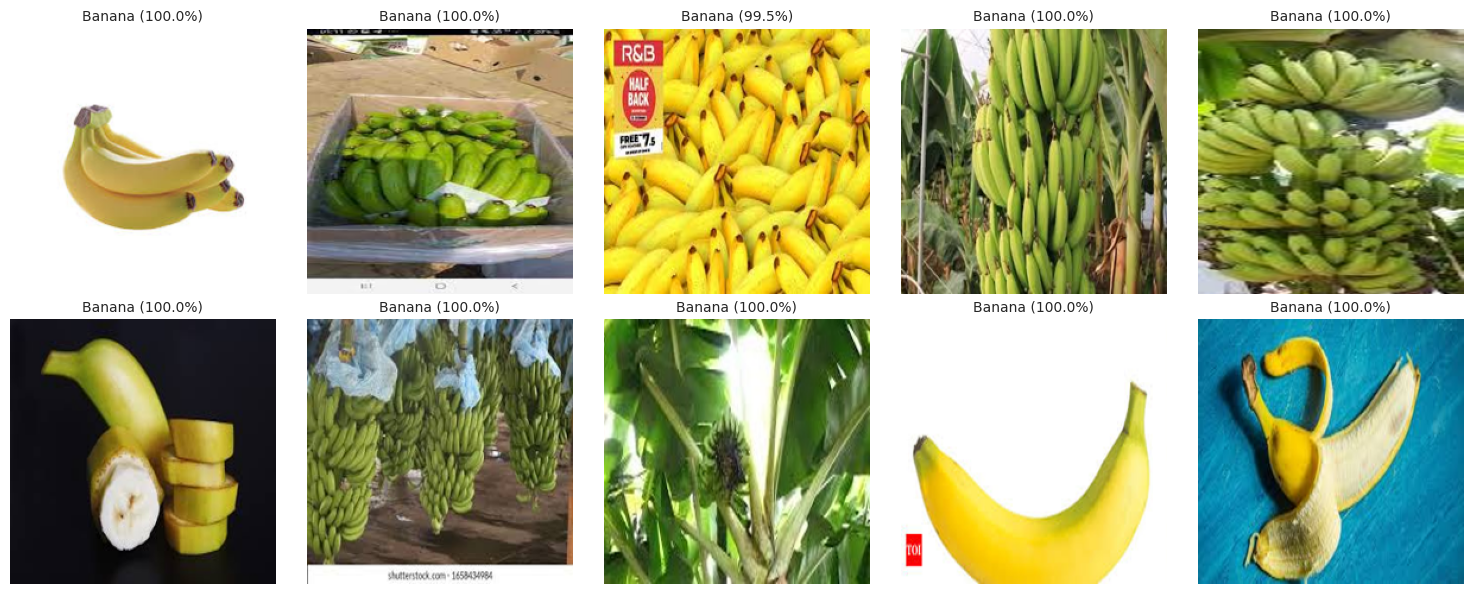

In [27]:
# Path ke direktori gambar dan model
image_dir = "Fruits Classification/test/Banana"
model_path = "submission/tflite/model.tflite"
label_path = "submission/tflite/label.txt"

# Load label dari file label.txt
with open(label_path, "r") as f:
    class_labels = [line.strip() for line in f.readlines()]

# Format gambar yang diperbolehkan
image_extensions = ['.jpg', '.jpeg', '.png']

# Ambil file gambar yang valid
image_files = [f for f in os.listdir(image_dir) if any(f.endswith(ext) for ext in image_extensions)]
image_files = sorted(image_files)[:10]  # Ambil 10 gambar pertama

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Cek ukuran input model
input_shape = input_details[0]['shape']
print(f"Input shape model: {input_shape}")

# Setup plot: 2 baris x 5 kolom
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Proses dan tampilkan gambar
for idx, image_file in enumerate(image_files):
    image_path = os.path.join(image_dir, image_file)

    # Load dan preprocess gambar
    img = Image.open(image_path).resize((input_shape[2], input_shape[1]))  # width, height
    img_array = np.array(img).astype(np.float32) / 255.0

    # Pastikan gambar memiliki 3 saluran warna
    if img_array.ndim == 2:  # grayscale
        img_array = np.stack([img_array] * 3, axis=-1)
    elif img_array.shape[-1] != 3:
        img_array = np.repeat(img_array, 3, axis=-1)

    # Tambahkan dimensi batch
    img_array = np.expand_dims(img_array, axis=0)

    # Inference
    interpreter.set_tensor(input_details[0]['index'], img_array)
    interpreter.invoke()
    pred = interpreter.get_tensor(output_details[0]['index'])[0]

    # Interpretasi hasil
    predicted_index = np.argmax(pred)
    predicted_label = class_labels[predicted_index]
    confidence = pred[predicted_index] * 100

    # Tampilkan hasil
    axes[idx].imshow(img)
    axes[idx].set_title(f"{predicted_label} ({confidence:.1f}%)", fontsize=10)
    axes[idx].axis('off')

# Kosongkan subplot jika < 10 gambar
for j in range(len(image_files), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig("hasil_inference_dengan_label_buah.png")
plt.show()


Saving tes_gambar.jpg to tes_gambar.jpg
Input shape model: [  1 224 224   3]


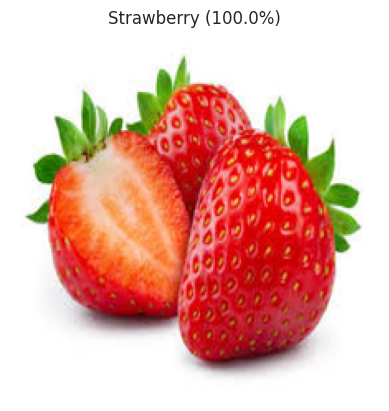

In [29]:
# Upload gambar
uploaded = files.upload()

# Path ke model dan label
model_path = 'submission/tflite/model.tflite'
label_path = 'submission/tflite/label.txt'

# Load label dari file label.txt
with open(label_path, "r") as f:
    class_labels = [line.strip() for line in f.readlines()]

# Load model TFLite
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Ambil detail input dan output dari model
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Cek bentuk input model
input_shape = input_details[0]['shape']
print(f"Input shape model: {input_shape}")

# Ambil file gambar yang di-upload
for filename in uploaded.keys():
    # Load dan preprocess gambar
    img = Image.open(filename).resize((input_shape[2], input_shape[1]))  # Sesuaikan dengan input shape
    img_array = np.array(img).astype(np.float32) / 255.0  # Normalisasi ke rentang [0, 1]

    # Pastikan gambar memiliki 3 saluran warna
    if img_array.ndim == 2:  # Jika gambar grayscale (2D), tambahkan saluran RGB
        img_array = np.stack([img_array] * 3, axis=-1)
    elif img_array.shape[-1] != 3:  # Jika gambar tidak memiliki 3 saluran, pastikan menjadi 3 saluran
        img_array = np.repeat(img_array, 3, axis=-1)

    # Tambahkan dimensi batch untuk input model
    img_array = np.expand_dims(img_array, axis=0)  # [1, height, width, 3]

    # Inference
    interpreter.set_tensor(input_details[0]['index'], img_array)
    interpreter.invoke()
    pred = interpreter.get_tensor(output_details[0]['index'])[0]

    # Interpretasi hasil
    predicted_index = np.argmax(pred)
    predicted_label = class_labels[predicted_index]
    confidence = pred[predicted_index] * 100

    # Tampilkan hasil
    plt.imshow(img)
    plt.title(f"{predicted_label} ({confidence:.1f}%)")
    plt.axis('off')
    plt.show()

In [30]:
pip freeze > requirements.txt